In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 Gradient Descent and Variants - 1

Function : f(x, y) = $x^2 + 100(y − x^2)^2$\
The Gradient wrt to x: $\nabla_xf(x,y) = 2x - 400x(y-x^2)$\
The Gradient wrt to y: $\nabla_yf(x,y) = 200(y-x^2)$

In [2]:
def grad(param):
    return np.array([2*param[0] - 400*param[0]*(param[1]-param[0]*param[0]),200*(param[1] - param[0]*param[0])])

def func(param):
    return param[0]*param[0] + 100*np.square(param[1] - param[0]*param[0])

### 1.1 Gradient Descent

In [3]:
def SGD():
    # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = np.random.rand(2)

    learning_rate = 0.001
    iterations = 0
    val = func(params)
    prev_val = 0
    params_list = [params]
    vals_list = [val]
    convergence_tol = 1e-07
    while abs(val-prev_val) > convergence_tol:    
        gradient = grad(params)
        params = params - learning_rate*gradient
        params_list.append(params)
        prev_val = val
        val = func(params)
        vals_list.append(val)
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    vals_list = np.sort(np.array(vals_list)[::1000])
    return params_list,vals_list,iterations

### 1.2 Gradient Descent using Polyak’s momentum

In [4]:
def PolyakGD():
    # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = np.random.rand(2)

    learning_rate = 0.001
    momentum = 0.9
    iterations = 0
    val = func(params)
    prev_val = 0
    params_list = [params,params]
    vals_list = [val]
    convergence_tol = 1e-07
    while abs(val-prev_val) > convergence_tol:    
#         We calculate gradient before updating params
        gradient = grad(params)
        params = params - learning_rate*gradient + momentum*(params - params_list[-2])
        params_list.append(params)
        prev_val = val
        val = func(params)
        vals_list.append(val)
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    vals_list = np.sort(np.array(vals_list)[::100])
    return params_list,vals_list,iterations

### 1.3 Nesterov accelerated gradient descent

In [5]:
def NesterovGD():
     # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = np.random.rand(2)

    learning_rate = 0.001
    momentum = 0.9
    iterations = 0
    val = func(params)
    prev_val = 0
    params_list = [params,params]
    vals_list = [val]
    convergence_tol = 1e-07
    while abs(val-prev_val) > convergence_tol:  
        params = params + momentum*(params - params_list[-2])
#         We calculate gradient after adding the momentum step
        params -= learning_rate*grad(params)
        params_list.append(params)
        prev_val = val
        val = func(params)
        vals_list.append(val)
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    vals_list = np.sort(np.array(vals_list)[::100])
    return params_list,vals_list,iterations

### 1.4 Adam optimizer

In [6]:
def AdamGD():
     # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = np.random.rand(2)

    learning_rate = 0.001
    avg_gradients = np.zeros(2)
    avg_gradients_hat = np.zeros(2)
    avg_gradients_2 = np.zeros(2)
    avg_gradients_2_hat = np.zeros(2)
    b1 = 0.9
    b1_pow = 0.9
    b2 = 0.999
    b2_pow = 0.999
    eps = 1e-07
    iterations = 0
    val = func(params)
    prev_val = 0
    params_list = [params]
    vals_list = [val]
    convergence_tol = 1e-07
    while abs(val-prev_val) > convergence_tol:    
        gradient = grad(params)
        avg_gradients = b1*avg_gradients + (1-b1)*gradient
        avg_gradients_hat = avg_gradients/(1-b1_pow)
        b1_pow = b1*b1_pow
        avg_gradients_2 = b2*avg_gradients_2 + (1-b2)*np.square(gradient)
        avg_gradients_2_hat = avg_gradients_2/(1-b2_pow)
        b2_pow = b2*b2_pow
        params = params - learning_rate*avg_gradients_hat/(np.sqrt(avg_gradients_2_hat)+eps)
        params_list.append(params)
        prev_val = val
        val = func(params)
        vals_list.append(val)
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    vals_list = np.sort(np.array(vals_list)[::1000])
    return params_list,vals_list,iterations

### Contour Plots of All the Optimization Methods

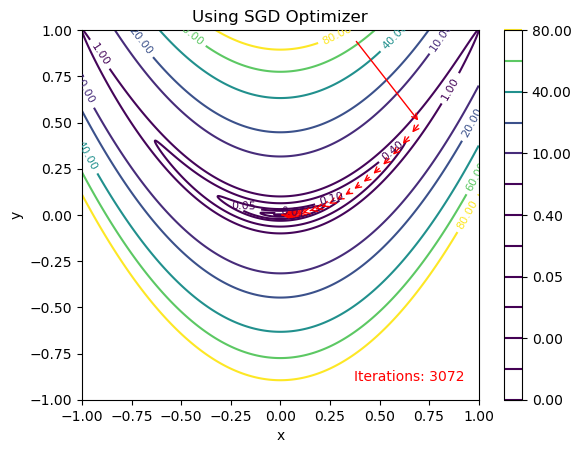

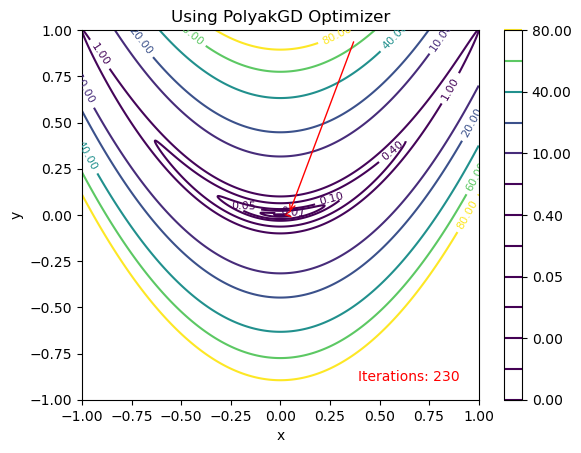

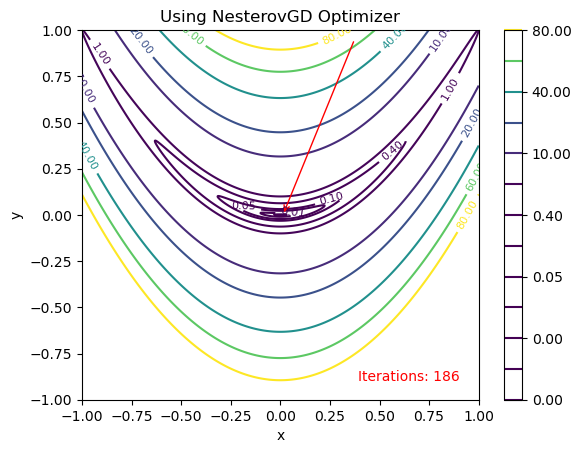

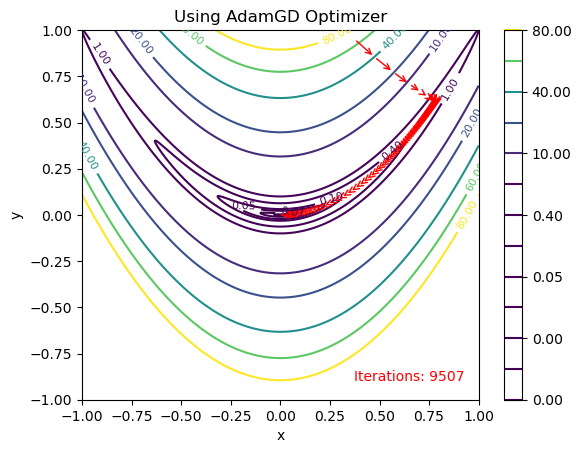

In [7]:
import sys

x_axis = np.linspace(-1,1,1000)
y_axis = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x_axis,y_axis)

def contour(fun):
    Z = np.vectorize(lambda x,y: x*x + 100*np.square(y - x*x))
    evaluated_grid = Z(X,Y)
#     Using the called optimiser
    params_list,vals_list,iterations = fun()
    
    levels = [1e-05,1e-04,1e-03,1e-02,5e-02,1e-01,4e-01,1,1e+01,2e+01,4e+01,6e+01,8e+01]
    
    plot = plt.contour(X,Y,evaluated_grid,levels=levels)
    plt.colorbar(plot)
    labels = plt.clabel(plot,fontsize=8)
    prev = params_list[0]
#     printing arrows to show updates. Used a set of updates after every 100 iterations
    for cord in params_list[1:]:
        plt.annotate('', xy=cord, xytext=prev,
                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                    va='center', ha='center')
        prev = cord
    
    plt.text(x=0.65,y=-0.9,s=f"Iterations: {iterations}",color='red',horizontalalignment='center')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Using {fun.__name__} Optimizer")
    plt.show()
    sys.stdout.flush()

contour(SGD)
contour(PolyakGD)
contour(NesterovGD)
contour(AdamGD)

## Gradient Descent and Variants - 2



Function : f(x, y) = $\frac{50}{9}(x^2 + y^2)^3 - \frac{209}{18}(x^2 + y^2)^2 + \frac{59}{9}(x^2 + y^2)$\
The Gradient wrt to x: $\nabla_xf(x,y) = \frac{300x(x^2 + y^2)^2 + 118x - 418x(x^2 + y^2)}{9}$\
The Gradient wrt to y: $\nabla_yf(x,y) = \frac{300y(x^2 + y^2)^2 + 118y - 418y(x^2 + y^2)}{9}$


In [8]:
def grad_(param):
    temp = np.sum(np.square(param))
    grad_x = 300*param[0]*temp*temp + 118*param[0] - 418*param[0]*temp
    grad_y = 300*param[1]*temp*temp + 118*param[1] - 418*param[1]*temp
    return np.array([grad_x/9,grad_y/9])

def func_(param):
    temp = np.sum(np.square(param))
    return temp*((50/9)*temp*temp - (209/18)*temp + (59/9))

### 2.1 Gradient Descent

In [9]:
def SGD_():
    # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = 0.6*np.random.rand(2)

    learning_rate = 0.001
    iterations = 0
    val = func_(params)
    prev_val = 0
    params_list = [params]
    convergence_tol = 0
    while abs(val-prev_val) > convergence_tol:    
        gradient = grad_(params)
        params = params - learning_rate*gradient
        params_list.append(params)
        prev_val = val
        val = func_(params)
        temp = np.sum(np.square(params))
#         print(f"{val} ===> {params} ==> {temp}")
        sys.stdout.flush()
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    return params_list,iterations

### 2.2 Gradient Descent using Polyak’s momentum

In [10]:
def PolyakGD_():
    # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = 0.6*np.random.rand(2)

    learning_rate = 0.001
    momentum = 0.9
    iterations = 0
    val = func_(params)
    prev_val = 0
    params_list = [params,params]
    convergence_tol = 0
    while abs(val-prev_val) > convergence_tol:    
#         We calculate gradient before updating params
        gradient = grad_(params)
        params = params - learning_rate*gradient + momentum*(params - params_list[-2])
        params_list.append(params)
        prev_val = val
        val = func_(params)
#         print(f"{val} ===> {params}")
        sys.stdout.flush()
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    return params_list,iterations

### 2.3 Nesterov accelerated gradient descent

In [11]:
def NesterovGD_():
     # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = 0.6*np.random.rand(2)

    learning_rate = 0.001
    momentum = 0.9
    iterations = 0
    val = func_(params)
    prev_val = 0
    params_list = [params,params]
    convergence_tol = 0
    while abs(val-prev_val) > convergence_tol:  
        params = params + momentum*(params - params_list[-2])
#         We calculate gradient after adding the momentum step
        params -= learning_rate*grad_(params)
        params_list.append(params)
        prev_val = val
        val = func_(params)
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    return params_list,iterations

### 2.4 Adam optimizer

In [12]:
def AdamGD_():
     # Setting the Seed as 42
    np.random.seed(42)

    # Initialising the Parameters
    params = 0.6*np.random.rand(2)

    learning_rate = 0.001
    avg_gradients = np.zeros(2)
    avg_gradients_hat = np.zeros(2)
    avg_gradients_2 = np.zeros(2)
    avg_gradients_2_hat = np.zeros(2)
    b1 = 0.9
    b1_pow = 0.9
    b2 = 0.999
    b2_pow = 0.999
    eps = 1e-07
    iterations = 0
    val = func_(params)
    prev_val = 0
    params_list = [params]
    convergence_tol = 1e-07
    while abs(val-prev_val) > convergence_tol:    
        gradient = grad_(params)
        avg_gradients = b1*avg_gradients + (1-b1)*gradient
        avg_gradients_hat = avg_gradients/(1-b1_pow)
        b1_pow = b1*b1_pow
        avg_gradients_2 = b2*avg_gradients_2 + (1-b2)*np.square(gradient)
        avg_gradients_2_hat = avg_gradients_2/(1-b2_pow)
        b2_pow = b2*b2_pow
        params = params - learning_rate*avg_gradients_hat/(np.sqrt(avg_gradients_2_hat)+eps)
        params_list.append(params)
        prev_val = val
        val = func_(params)
        iterations+=1

    params_list = np.array(params_list)[::100,:]
    return params_list,iterations

### Contour Plots of All the Optimization Methods

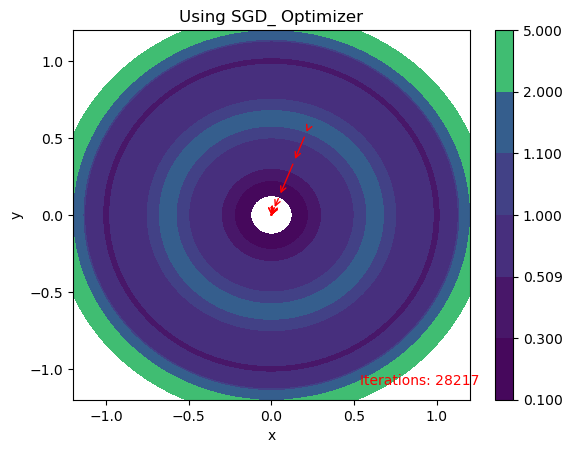

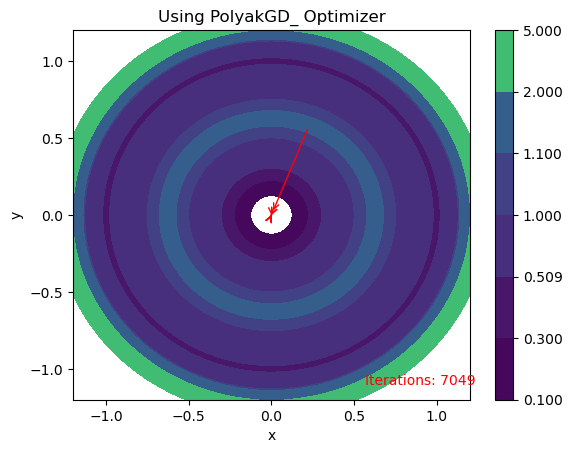

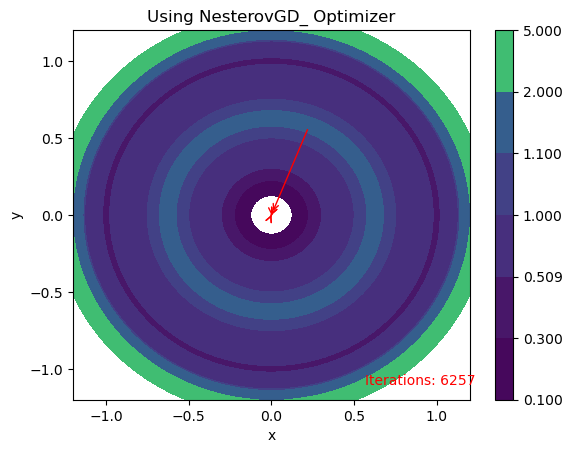

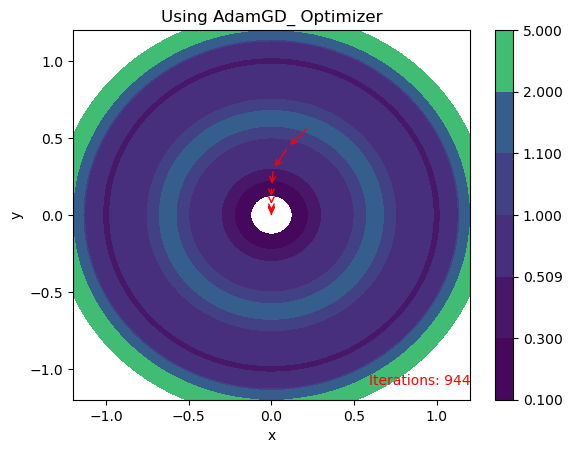

In [14]:
import sys

x_axis = np.linspace(-1.2,1.2,1000)
y_axis = np.linspace(-1.2,1.2,1000)
X,Y = np.meshgrid(x_axis,y_axis)

def contour(fun):
    Z = np.vectorize(lambda x,y: func_([x,y]))
    evaluated_grid = Z(X,Y)
#     Using the called optimiser
    params_list,iterations = fun()
    
    levels = [0.1,0.3,0.509,1,1.1,2,5]
    
    plot = plt.contourf(X,Y,evaluated_grid,levels=levels)
    plt.colorbar(plot)
#     labels = plt.clabel(plot,fontsize=8)
    prev = params_list[0]
#     printing arrows to show updates. Used a set of updates after every 100 iterations
    for cord in params_list[1:]:
        plt.annotate('', xy=cord, xytext=prev,
                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                    va='center', ha='center')
        prev = cord
    
    plt.text(x=0.9,y=-1.1,s=f"Iterations: {iterations}",color='red',horizontalalignment='center')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Using {fun.__name__} Optimizer")
    plt.show()
    sys.stdout.flush()

contour(SGD_)
contour(PolyakGD_)
contour(NesterovGD_)
contour(AdamGD_)